In [22]:
!pip install scipy --upgrade
!pip install seaborn --upgrade
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_recall_curve, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree


In [41]:
import ace_tools as tools

ModuleNotFoundError: No module named 'ace_tools'

In [23]:
# Import csv dataset
csv = "Technical_Support_Dataset.csv"
df = pd.read_csv(csv)
df.head()

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,Expected SLA to resolve,Expected SLA to first response,...,Resolution time,SLA For Resolution,Close time,Agent interactions,Survey results,Product group,Support Level,Country,Latitude,Longitude
0,Closed,1012,Low,Email,Feature request,1st line support,Kristos Westoll,2023-01-02 00:58:36,2023-01-04 00:58:36,2023-01-02 01:58:36,...,2023-01-04 00:31:51.694,Within SLA,2023-01-04 04:02:59.013,1.0,3.0,Custom software development,Tier 1,Republic of Ireland,53.094024,-8.019675
1,In progress,1013,High,Phone,Product setup,2nd line support,Adolpho Messingham,2023-01-02 07:27:25,2023-01-04 07:27:25,2023-01-02 07:29:25,...,NaN,SLA Violated,NaN,3.0,NaN,Other,Tier 2,Italy,43.036776,12.678565
2,Resolved,1014,Low,Chat,Purchasing and invoicing,1st line support,Bernard Beckley,2023-01-02 06:59:04,2023-01-03 06:59:04,2023-01-02 07:01:04,...,2023-01-02 22:45:32.974,Within SLA,NaN,2.0,NaN,Custom software development,Tier 1,Austria,47.696472,13.345735
3,Closed,1015,Medium,Email,Pricing and licensing,1st line support,Connor Danielovitch,2023-01-03 03:09:39,2023-01-05 03:09:39,2023-01-03 04:09:39,...,2023-01-04 14:32:34.979,Within SLA,2023-01-08 04:24:54.771,10.0,4.0,Ready to use Software,Tier 1,Spain,39.673370,-4.767726
4,Closed,1016,Low,Email,Product setup,1st line support,Kristos Westoll,2023-01-03 00:03:58,2023-01-05 00:03:58,2023-01-03 01:03:58,...,2023-01-04 12:03:05.986,Within SLA,2023-01-06 06:05:08.637,1.0,2.0,Other,Tier 1,Austria,47.696472,13.345735


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Status                          2330 non-null   object 
 1   Ticket ID                       2330 non-null   int64  
 2   Priority                        2330 non-null   object 
 3   Source                          2330 non-null   object 
 4   Topic                           2330 non-null   object 
 5   Agent Group                     2330 non-null   object 
 6   Agent Name                      2330 non-null   object 
 7   Created time                    2330 non-null   object 
 8   Expected SLA to resolve         2330 non-null   object 
 9   Expected SLA to first response  2330 non-null   object 
 10  First response time             2312 non-null   object 
 11  SLA For first response          2330 non-null   object 
 12  Resolution time                 19

In [25]:
# Convert datetime columns to daetime format
datetime_cols = ['Created time', 'Expected SLA to resolve', 'Expected SLA to first response', 'Resolution time', 'Close time']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Status                          2330 non-null   object        
 1   Ticket ID                       2330 non-null   int64         
 2   Priority                        2330 non-null   object        
 3   Source                          2330 non-null   object        
 4   Topic                           2330 non-null   object        
 5   Agent Group                     2330 non-null   object        
 6   Agent Name                      2330 non-null   object        
 7   Created time                    2330 non-null   datetime64[ns]
 8   Expected SLA to resolve         2330 non-null   datetime64[ns]
 9   Expected SLA to first response  2330 non-null   datetime64[ns]
 10  First response time             2312 non-null   object        
 11  SLA 

In [27]:
df.head()

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,Expected SLA to resolve,Expected SLA to first response,...,Resolution time,SLA For Resolution,Close time,Agent interactions,Survey results,Product group,Support Level,Country,Latitude,Longitude
0,Closed,1012,Low,Email,Feature request,1st line support,Kristos Westoll,2023-01-02 00:58:36,2023-01-04 00:58:36,2023-01-02 01:58:36,...,2023-01-04 00:31:51.694,Within SLA,2023-01-04 04:02:59.013,1.0,3.0,Custom software development,Tier 1,Republic of Ireland,53.094024,-8.019675
1,In progress,1013,High,Phone,Product setup,2nd line support,Adolpho Messingham,2023-01-02 07:27:25,2023-01-04 07:27:25,2023-01-02 07:29:25,...,NaT,SLA Violated,NaT,3.0,NaN,Other,Tier 2,Italy,43.036776,12.678565
2,Resolved,1014,Low,Chat,Purchasing and invoicing,1st line support,Bernard Beckley,2023-01-02 06:59:04,2023-01-03 06:59:04,2023-01-02 07:01:04,...,2023-01-02 22:45:32.974,Within SLA,NaT,2.0,NaN,Custom software development,Tier 1,Austria,47.696472,13.345735
3,Closed,1015,Medium,Email,Pricing and licensing,1st line support,Connor Danielovitch,2023-01-03 03:09:39,2023-01-05 03:09:39,2023-01-03 04:09:39,...,2023-01-04 14:32:34.979,Within SLA,2023-01-08 04:24:54.771,10.0,4.0,Ready to use Software,Tier 1,Spain,39.673370,-4.767726
4,Closed,1016,Low,Email,Product setup,1st line support,Kristos Westoll,2023-01-03 00:03:58,2023-01-05 00:03:58,2023-01-03 01:03:58,...,2023-01-04 12:03:05.986,Within SLA,2023-01-06 06:05:08.637,1.0,2.0,Other,Tier 1,Austria,47.696472,13.345735


In [28]:
missing_survey_results_count = df['Survey results'].isnull().sum()
missing_survey_results_count

1157

In [29]:
# Filter rows where 'Survey results' are missing
missing_survey_results_df = df[df['Survey results'].isnull()]

# Export the filtered dataset to a CSV file
file_path = "missing_survey_results.csv"
missing_survey_results_df.to_csv(file_path, index=False)

file_path

'missing_survey_results.csv'

In [30]:
df_missing = pd.read_csv('missing_survey_results.csv')
df_missing.head()

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,Expected SLA to resolve,Expected SLA to first response,...,Resolution time,SLA For Resolution,Close time,Agent interactions,Survey results,Product group,Support Level,Country,Latitude,Longitude
0,In progress,1013,High,Phone,Product setup,2nd line support,Adolpho Messingham,2023-01-02 07:27:25,2023-01-04 07:27:25,2023-01-02 07:29:25,...,NaN,SLA Violated,NaN,3.0,NaN,Other,Tier 2,Italy,43.036776,12.678565
1,Resolved,1014,Low,Chat,Purchasing and invoicing,1st line support,Bernard Beckley,2023-01-02 06:59:04,2023-01-03 06:59:04,2023-01-02 07:01:04,...,2023-01-02 22:45:32.974,Within SLA,NaN,2.0,NaN,Custom software development,Tier 1,Austria,47.696472,13.345735
2,Resolved,1019,Medium,Chat,Pricing and licensing,2nd line support,Michele Whyatt,2023-01-03 00:38:48,2023-01-04 00:38:48,2023-01-03 00:40:48,...,2023-01-05 12:47:55.793,SLA Violated,NaN,2.0,NaN,Training and Consulting Services,Tier 2,Poland,52.536273,19.050639
3,Resolved,1020,Medium,Chat,Product setup,1st line support,Kristos Westoll,2023-01-03 09:37:54,2023-01-04 09:37:54,2023-01-03 09:39:54,...,2023-01-03 20:31:37.896,Within SLA,NaN,6.0,NaN,Other,Tier 1,Germany,51.165691,10.451526
4,Resolved,1027,Low,Chat,Training request,1st line support,Bernard Beckley,2023-01-04 07:27:56,2023-01-05 07:27:56,2023-01-04 07:29:56,...,2023-01-05 04:41:40.506,Within SLA,NaN,3.0,NaN,Training and Consulting Services,Tier 1,United Kingdom,55.378052,-3.435973


In [31]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Status                          1157 non-null   object 
 1   Ticket ID                       1157 non-null   int64  
 2   Priority                        1157 non-null   object 
 3   Source                          1157 non-null   object 
 4   Topic                           1157 non-null   object 
 5   Agent Group                     1157 non-null   object 
 6   Agent Name                      1157 non-null   object 
 7   Created time                    1157 non-null   object 
 8   Expected SLA to resolve         1157 non-null   object 
 9   Expected SLA to first response  1157 non-null   object 
 10  First response time             1139 non-null   object 
 11  SLA For first response          1157 non-null   object 
 12  Resolution time                 73

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Status                          2330 non-null   object        
 1   Ticket ID                       2330 non-null   int64         
 2   Priority                        2330 non-null   object        
 3   Source                          2330 non-null   object        
 4   Topic                           2330 non-null   object        
 5   Agent Group                     2330 non-null   object        
 6   Agent Name                      2330 non-null   object        
 7   Created time                    2330 non-null   datetime64[ns]
 8   Expected SLA to resolve         2330 non-null   datetime64[ns]
 9   Expected SLA to first response  2330 non-null   datetime64[ns]
 10  First response time             2312 non-null   object        
 11  SLA 

In [33]:
df_cleaned = df.dropna(subset=['Survey results'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, 0 to 2322
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Status                          1173 non-null   object        
 1   Ticket ID                       1173 non-null   int64         
 2   Priority                        1173 non-null   object        
 3   Source                          1173 non-null   object        
 4   Topic                           1173 non-null   object        
 5   Agent Group                     1173 non-null   object        
 6   Agent Name                      1173 non-null   object        
 7   Created time                    1173 non-null   datetime64[ns]
 8   Expected SLA to resolve         1173 non-null   datetime64[ns]
 9   Expected SLA to first response  1173 non-null   datetime64[ns]
 10  First response time             1173 non-null   object        
 11  SLA For f

In [19]:
df_cleaned.head()

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,Expected SLA to resolve,Expected SLA to first response,...,Resolution time,SLA For Resolution,Close time,Agent interactions,Survey results,Product group,Support Level,Country,Latitude,Longitude
0,Closed,1012,Low,Email,Feature request,1st line support,Kristos Westoll,2023-01-02 00:58:36,2023-01-04 00:58:36,2023-01-02 01:58:36,...,2023-01-04 00:31:51.694,Within SLA,2023-01-04 04:02:59.013,1.0,3.0,Custom software development,Tier 1,Republic of Ireland,53.094024,-8.019675
3,Closed,1015,Medium,Email,Pricing and licensing,1st line support,Connor Danielovitch,2023-01-03 03:09:39,2023-01-05 03:09:39,2023-01-03 04:09:39,...,2023-01-04 14:32:34.979,Within SLA,2023-01-08 04:24:54.771,10.0,4.0,Ready to use Software,Tier 1,Spain,39.673370,-4.767726
4,Closed,1016,Low,Email,Product setup,1st line support,Kristos Westoll,2023-01-03 00:03:58,2023-01-05 00:03:58,2023-01-03 01:03:58,...,2023-01-04 12:03:05.986,Within SLA,2023-01-06 06:05:08.637,1.0,2.0,Other,Tier 1,Austria,47.696472,13.345735
5,Closed,1017,Low,Email,Purchasing and invoicing,1st line support,Sheela Cutten,2023-01-03 14:25:42,2023-01-05 14:25:42,2023-01-03 15:25:42,...,2023-01-04 01:55:56.533,Within SLA,2023-01-10 16:41:07.865,2.0,2.0,Ready to use Software,Tier 1,Greece,39.368279,21.863141
6,Closed,1018,Low,Phone,Product setup,1st line support,Kristos Westoll,2023-01-03 15:32:02,2023-01-05 15:32:02,2023-01-03 15:34:02,...,2023-01-05 03:51:37.031,Within SLA,2023-01-07 21:52:35.202,2.0,3.0,Ready to use Software,Tier 1,Republic of Ireland,53.094024,-8.019675


In [34]:
# Add separate Year, Month, Day, Weekday and Time column for all datetime columns
# Ensure all specified columns are in datetime format
datetime_columns = [
    "Created time",
    "Expected SLA to resolve",
    "Expected SLA to first response",
    "Resolution time",
    "Close time",
]

# Create a copy of the dataframe to avoid SettingWithCopyWarning
df_cleaned = df_cleaned.copy()

# Convert to datetime format
for col in datetime_columns:
    if col in df_cleaned.columns:
        df_cleaned.loc[:, col] = pd.to_datetime(df_cleaned[col], errors="coerce")

# Generate year, month, day, weekday, and time for each datetime column
for col in datetime_columns:
    if col in df_cleaned.columns:
        df_cleaned.loc[:, f"{col} Year"] = df_cleaned[col].dt.year
        df_cleaned.loc[:, f"{col} Month"] = df_cleaned[col].dt.month
        df_cleaned.loc[:, f"{col} Day"] = df_cleaned[col].dt.day
        df_cleaned.loc[:, f"{col} Weekday"] = df_cleaned[col].dt.day_name()
        df_cleaned.loc[:, f"{col} Time"] = df_cleaned[col].dt.time

In [35]:
df_cleaned.head()

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,Expected SLA to resolve,Expected SLA to first response,...,Resolution time Year,Resolution time Month,Resolution time Day,Resolution time Weekday,Resolution time Time,Close time Year,Close time Month,Close time Day,Close time Weekday,Close time Time
0,Closed,1012,Low,Email,Feature request,1st line support,Kristos Westoll,2023-01-02 00:58:36,2023-01-04 00:58:36,2023-01-02 01:58:36,...,2023,1,4,Wednesday,00:31:51.694000,2023,1,4,Wednesday,04:02:59.013000
3,Closed,1015,Medium,Email,Pricing and licensing,1st line support,Connor Danielovitch,2023-01-03 03:09:39,2023-01-05 03:09:39,2023-01-03 04:09:39,...,2023,1,4,Wednesday,14:32:34.979000,2023,1,8,Sunday,04:24:54.771000
4,Closed,1016,Low,Email,Product setup,1st line support,Kristos Westoll,2023-01-03 00:03:58,2023-01-05 00:03:58,2023-01-03 01:03:58,...,2023,1,4,Wednesday,12:03:05.986000,2023,1,6,Friday,06:05:08.637000
5,Closed,1017,Low,Email,Purchasing and invoicing,1st line support,Sheela Cutten,2023-01-03 14:25:42,2023-01-05 14:25:42,2023-01-03 15:25:42,...,2023,1,4,Wednesday,01:55:56.533000,2023,1,10,Tuesday,16:41:07.865000
6,Closed,1018,Low,Phone,Product setup,1st line support,Kristos Westoll,2023-01-03 15:32:02,2023-01-05 15:32:02,2023-01-03 15:34:02,...,2023,1,5,Thursday,03:51:37.031000,2023,1,7,Saturday,21:52:35.202000


In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, 0 to 2322
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Status                                  1173 non-null   object        
 1   Ticket ID                               1173 non-null   int64         
 2   Priority                                1173 non-null   object        
 3   Source                                  1173 non-null   object        
 4   Topic                                   1173 non-null   object        
 5   Agent Group                             1173 non-null   object        
 6   Agent Name                              1173 non-null   object        
 7   Created time                            1173 non-null   datetime64[ns]
 8   Expected SLA to resolve                 1173 non-null   datetime64[ns]
 9   Expected SLA to first response          1173 non-null   d

In [37]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Now check the first few rows
df_cleaned.head()

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,Expected SLA to resolve,Expected SLA to first response,First response time,SLA For first response,Resolution time,SLA For Resolution,Close time,Agent interactions,Survey results,Product group,Support Level,Country,Latitude,Longitude,Created time Year,Created time Month,Created time Day,Created time Weekday,Created time Time,Expected SLA to resolve Year,Expected SLA to resolve Month,Expected SLA to resolve Day,Expected SLA to resolve Weekday,Expected SLA to resolve Time,Expected SLA to first response Year,Expected SLA to first response Month,Expected SLA to first response Day,Expected SLA to first response Weekday,Expected SLA to first response Time,Resolution time Year,Resolution time Month,Resolution time Day,Resolution time Weekday,Resolution time Time,Close time Year,Close time Month,Close time Day,Close time Weekday,Close time Time
0,Closed,1012,Low,Email,Feature request,1st line support,Kristos Westoll,2023-01-02 00:58:36,2023-01-04 00:58:36,2023-01-02 01:58:36,2023-01-02 01:03:17.432,Within SLA,2023-01-04 00:31:51.694,Within SLA,2023-01-04 04:02:59.013,1.0,3.0,Custom software development,Tier 1,Republic of Ireland,53.094024,-8.019675,2023,1,2,Monday,00:58:36,2023,1,4,Wednesday,00:58:36,2023,1,2,Monday,01:58:36,2023,1,4,Wednesday,00:31:51.694000,2023,1,4,Wednesday,04:02:59.013000
3,Closed,1015,Medium,Email,Pricing and licensing,1st line support,Connor Danielovitch,2023-01-03 03:09:39,2023-01-05 03:09:39,2023-01-03 04:09:39,2023-01-03 07:09:15.835,SLA Violated,2023-01-04 14:32:34.979,Within SLA,2023-01-08 04:24:54.771,10.0,4.0,Ready to use Software,Tier 1,Spain,39.673370,-4.767726,2023,1,3,Tuesday,03:09:39,2023,1,5,Thursday,03:09:39,2023,1,3,Tuesday,04:09:39,2023,1,4,Wednesday,14:32:34.979000,2023,1,8,Sunday,04:24:54.771000
4,Closed,1016,Low,Email,Product setup,1st line support,Kristos Westoll,2023-01-03 00:03:58,2023-01-05 00:03:58,2023-01-03 01:03:58,2023-01-03 00:08:01.684,Within SLA,2023-01-04 12:03:05.986,Within SLA,2023-01-06 06:05:08.637,1.0,2.0,Other,Tier 1,Austria,47.696472,13.345735,2023,1,3,Tuesday,00:03:58,2023,1,5,Thursday,00:03:58,2023,1,3,Tuesday,01:03:58,2023,1,4,Wednesday,12:03:05.986000,2023,1,6,Friday,06:05:08.637000
5,Closed,1017,Low,Email,Purchasing and invoicing,1st line support,Sheela Cutten,2023-01-03 14:25:42,2023-01-05 14:25:42,2023-01-03 15:25:42,2023-01-03 14:45:14.430,Within SLA,2023-01-04 01:55:56.533,Within SLA,2023-01-10 16:41:07.865,2.0,2.0,Ready to use Software,Tier 1,Greece,39.368279,21.863141,2023,1,3,Tuesday,14:25:42,2023,1,5,Thursday,14:25:42,2023,1,3,Tuesday,15:25:42,2023,1,4,Wednesday,01:55:56.533000,2023,1,10,Tuesday,16:41:07.865000
6,Closed,1018,Low,Phone,Product setup,1st line support,Kristos Westoll,2023-01-03 15:32:02,2023-01-05 15:32:02,2023-01-03 15:34:02,2023-01-03 15:34:00.278,Within SLA,2023-01-05 03:51:37.031,Within SLA,2023-01-07 21:52:35.202,2.0,3.0,Ready to use Software,Tier 1,Republic of Ireland,53.094024,-8.019675,2023,1,3,Tuesday,15:32:02,2023,1,5,Thursday,15:32:02,2023,1,3,Tuesday,15:34:02,2023,1,5,Thursday,03:51:37.031000,2023,1,7,Saturday,21:52:35.202000


In [38]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, 0 to 2322
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Status                                  1173 non-null   object        
 1   Ticket ID                               1173 non-null   int64         
 2   Priority                                1173 non-null   object        
 3   Source                                  1173 non-null   object        
 4   Topic                                   1173 non-null   object        
 5   Agent Group                             1173 non-null   object        
 6   Agent Name                              1173 non-null   object        
 7   Created time                            1173 non-null   datetime64[ns]
 8   Expected SLA to resolve                 1173 non-null   datetime64[ns]
 9   Expected SLA to first response          1173 non-null   d

In [42]:
# Identify numerical columns for outlier detection
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Calculate outliers using the IQR method
outlier_summary = {}
for col in numerical_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)).sum()
    outlier_summary[col] = outliers


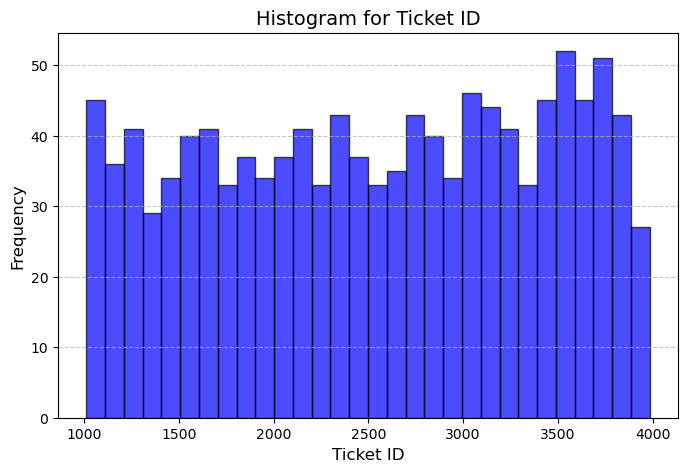

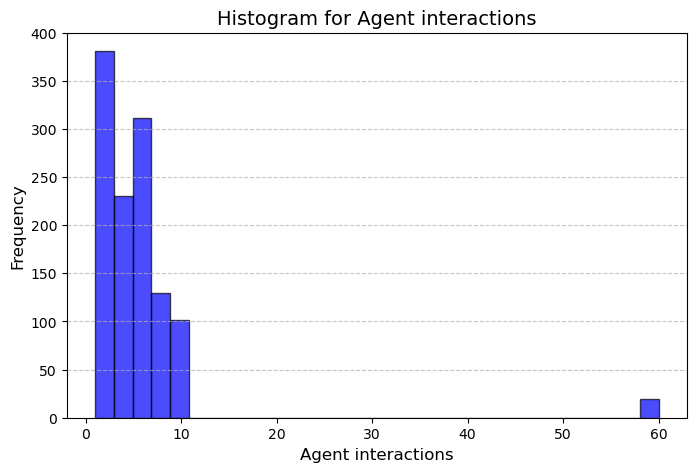

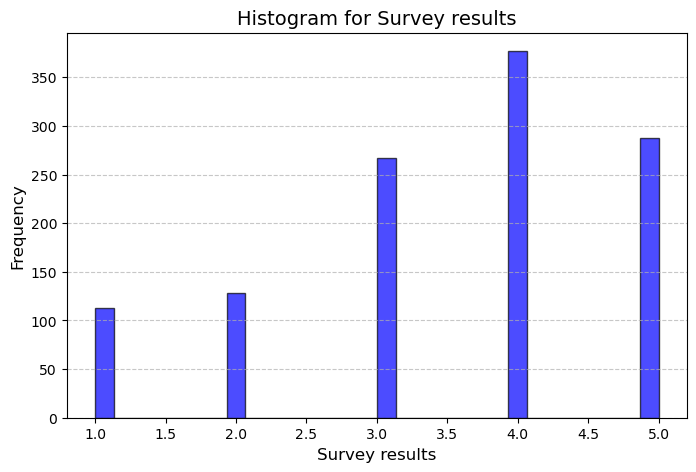

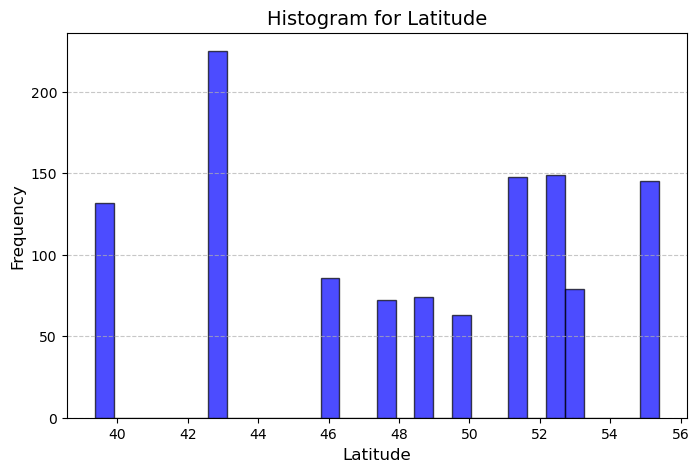

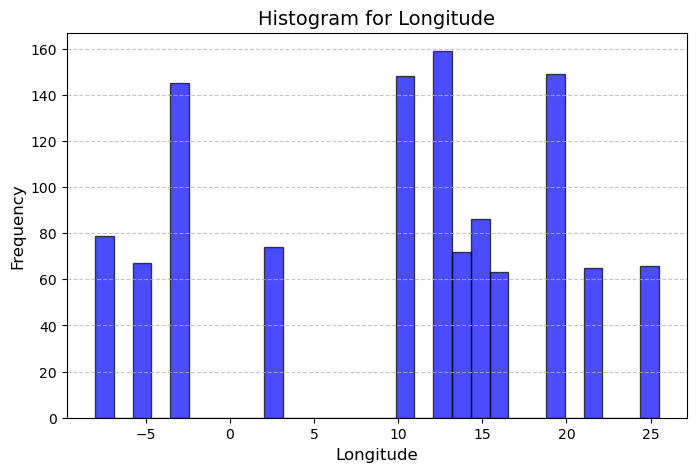

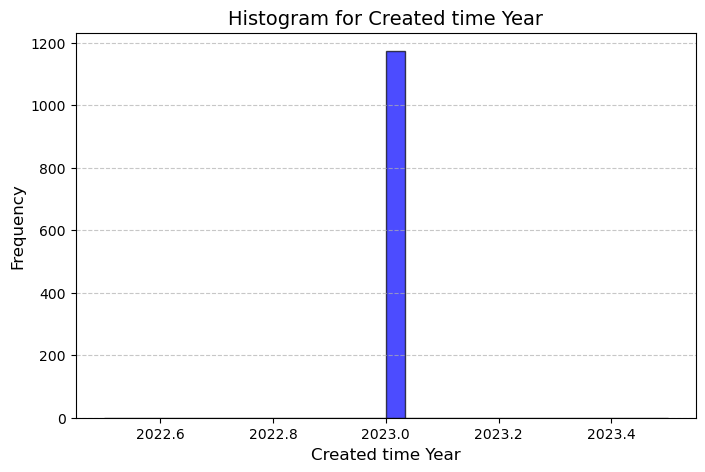

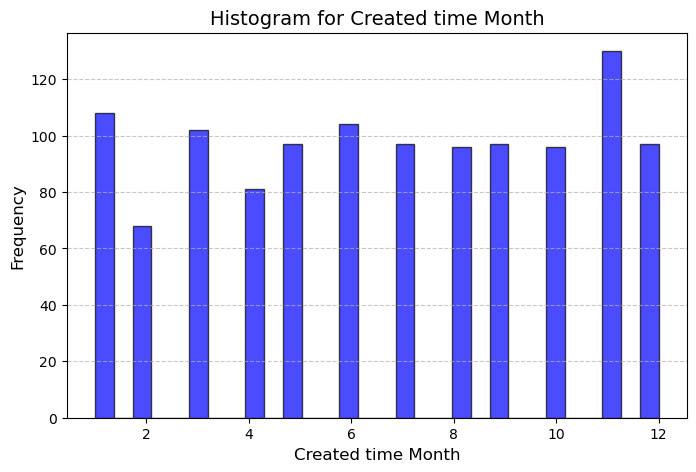

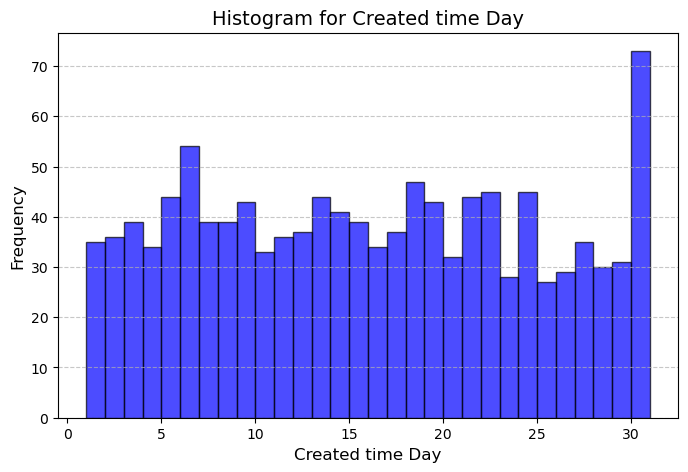

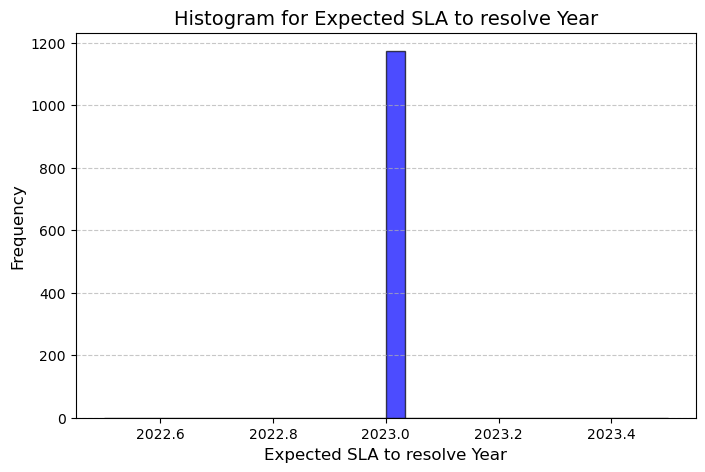

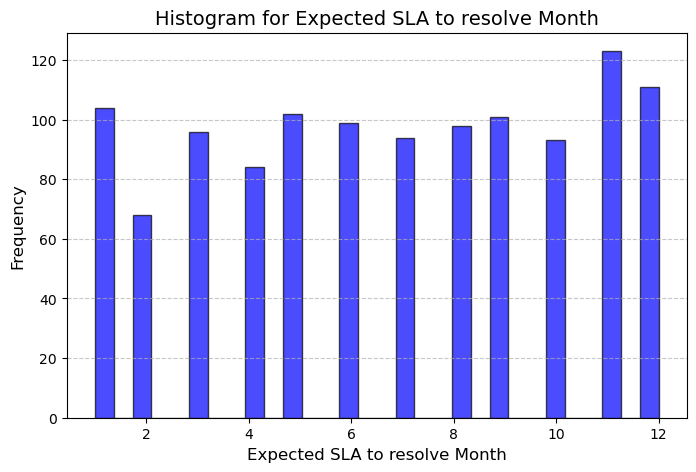

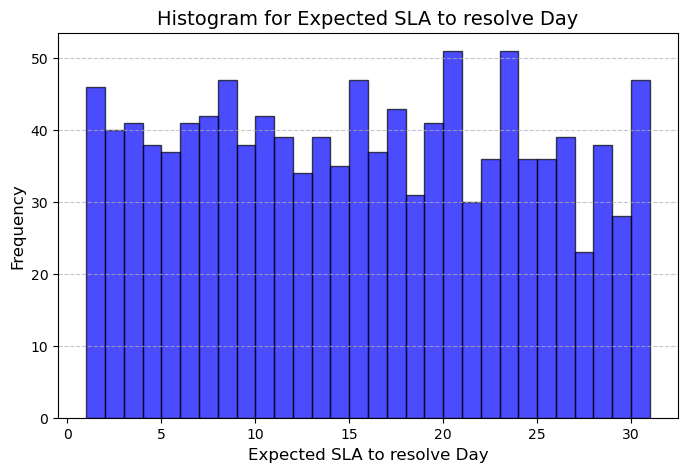

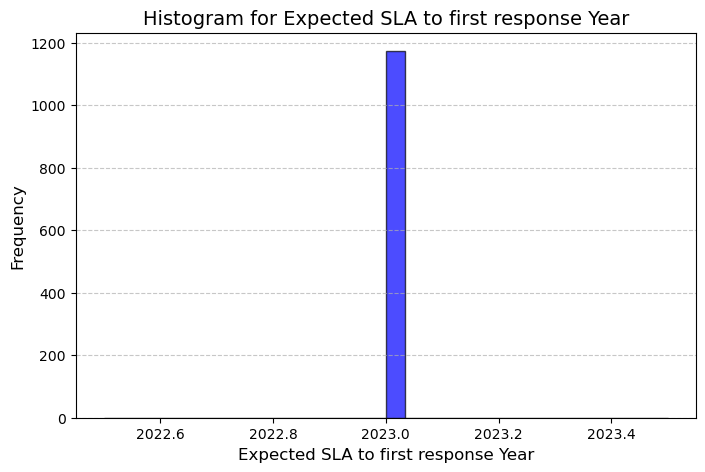

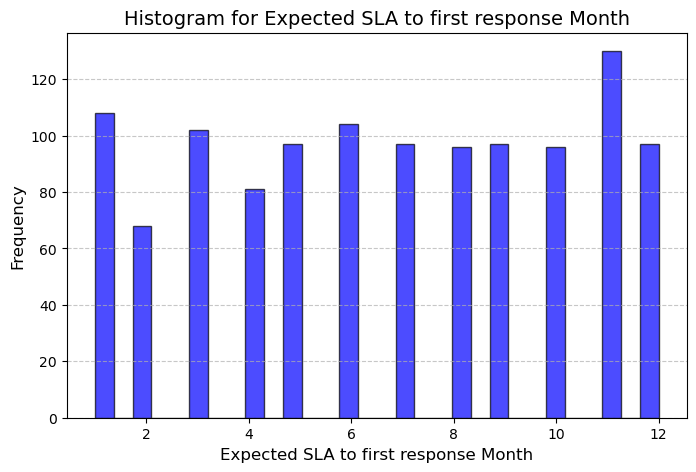

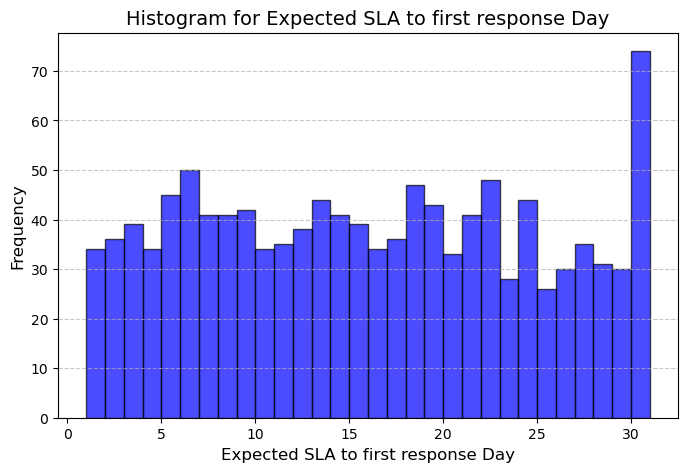

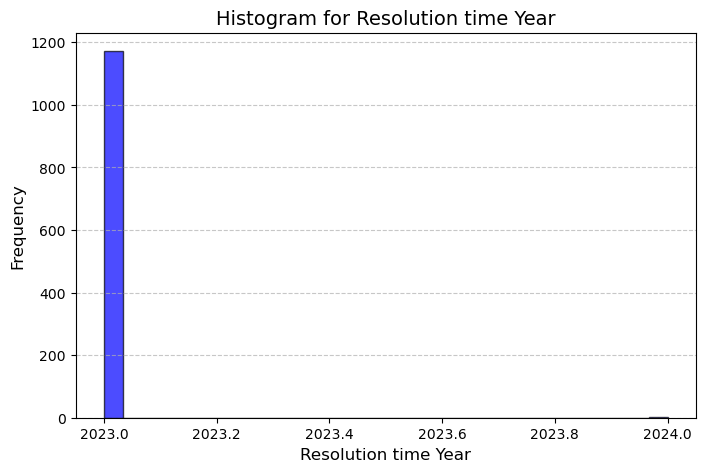

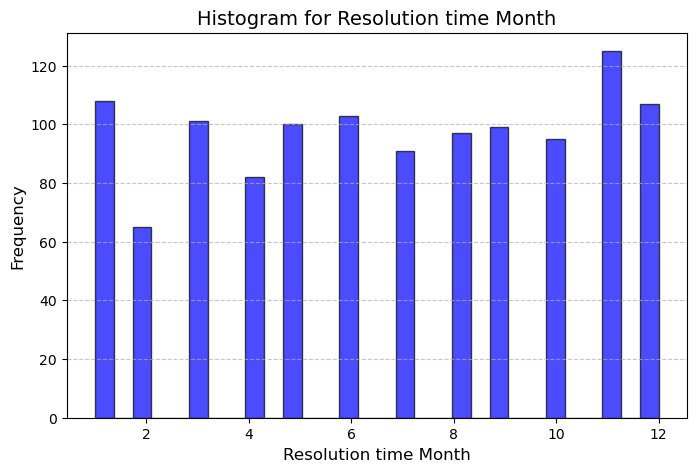

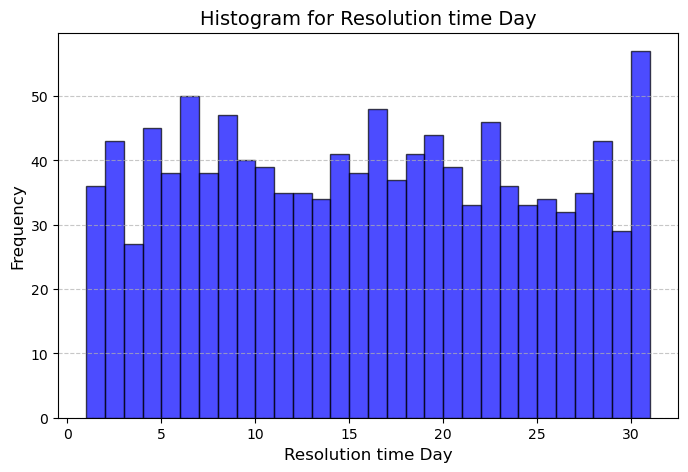

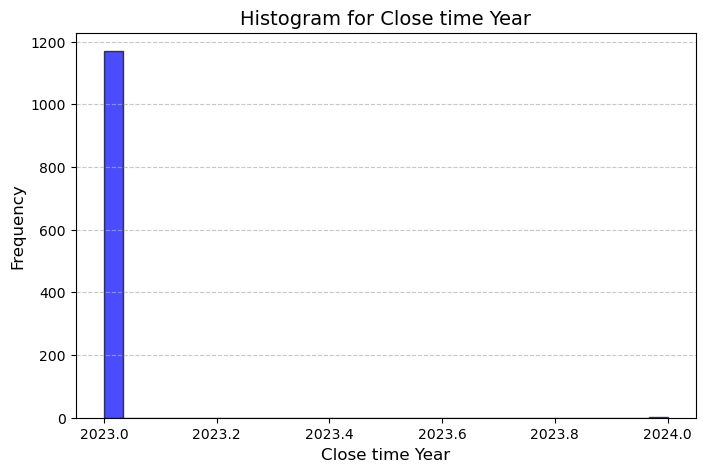

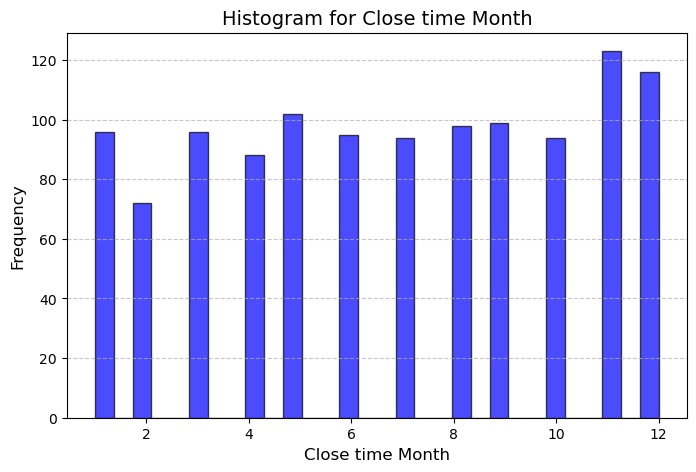

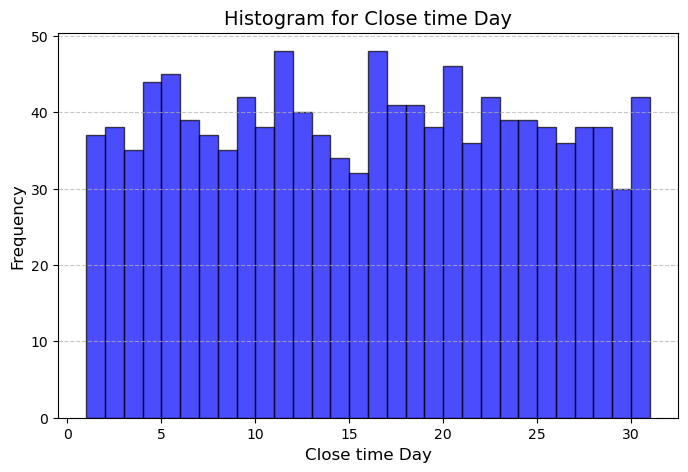

In [43]:
# Plot histograms for numerical columns with outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df_cleaned[col].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Histogram for {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [46]:
df60 = df_cleaned[df_cleaned['Agent interactions'] == 60]

In [47]:
df60.head()

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,Expected SLA to resolve,Expected SLA to first response,First response time,SLA For first response,Resolution time,SLA For Resolution,Close time,Agent interactions,Survey results,Product group,Support Level,Country,Latitude,Longitude,Created time Year,Created time Month,Created time Day,Created time Weekday,Created time Time,Expected SLA to resolve Year,Expected SLA to resolve Month,Expected SLA to resolve Day,Expected SLA to resolve Weekday,Expected SLA to resolve Time,Expected SLA to first response Year,Expected SLA to first response Month,Expected SLA to first response Day,Expected SLA to first response Weekday,Expected SLA to first response Time,Resolution time Year,Resolution time Month,Resolution time Day,Resolution time Weekday,Resolution time Time,Close time Year,Close time Month,Close time Day,Close time Weekday,Close time Time
10,Closed,1024,Medium,Chat,Other,1st line support,Bernard Beckley,2023-01-03 16:41:11,2023-01-04 16:41:11,2023-01-03 16:43:11,2023-01-03 16:43:40.942,SLA Violated,2023-01-03 23:52:18.292,Within SLA,2023-01-06 00:38:58.704,60.0,5.0,Custom software development,Tier 1,Czech Republic,49.803763,15.474913,2023,1,3,Tuesday,16:41:11,2023,1,4,Wednesday,16:41:11,2023,1,3,Tuesday,16:43:11,2023,1,3,Tuesday,23:52:18.292000,2023,1,6,Friday,00:38:58.704000
15,Closed,1029,Medium,Chat,Feature request,1st line support,Bernard Beckley,2023-01-04 09:12:41,2023-01-05 09:12:41,2023-01-04 09:14:41,2023-01-04 09:13:35.162,Within SLA,2023-01-05 07:45:18.346,Within SLA,2023-01-06 23:18:19.761,60.0,5.0,Custom software development,Tier 1,Germany,51.165691,10.451526,2023,1,4,Wednesday,09:12:41,2023,1,5,Thursday,09:12:41,2023,1,4,Wednesday,09:14:41,2023,1,5,Thursday,07:45:18.346000,2023,1,6,Friday,23:18:19.761000
98,Closed,1134,Low,Chat,Product setup,1st line support,Sheela Cutten,2023-01-16 12:50:35,2023-01-17 12:50:35,2023-01-16 12:52:35,2023-01-16 12:51:00.245,Within SLA,2023-01-16 17:37:43.459,Within SLA,2023-01-20 18:38:43.224,60.0,5.0,Custom software development,Tier 1,Spain,39.673370,-4.767726,2023,1,16,Monday,12:50:35,2023,1,17,Tuesday,12:50:35,2023,1,16,Monday,12:52:35,2023,1,16,Monday,17:37:43.459000,2023,1,20,Friday,18:38:43.224000
166,Closed,1214,Low,Chat,Other,1st line support,Sheela Cutten,2023-01-24 07:06:15,2023-01-25 07:06:15,2023-01-24 07:08:15,2023-01-24 07:07:53.387,Within SLA,2023-01-24 14:26:31.591,Within SLA,2023-01-29 04:04:00.979,60.0,5.0,Ready to use Software,Tier 1,United Kingdom,55.378052,-3.435973,2023,1,24,Tuesday,07:06:15,2023,1,25,Wednesday,07:06:15,2023,1,24,Tuesday,07:08:15,2023,1,24,Tuesday,14:26:31.591000,2023,1,29,Sunday,04:04:00.979000
236,Closed,1297,Low,Chat,Product setup,1st line support,Sheela Cutten,2023-02-02 23:36:10,2023-02-03 23:36:10,2023-02-02 23:38:10,2023-02-02 23:37:50.697,Within SLA,2023-02-03 22:56:52.625,Within SLA,2023-02-06 17:51:51.562,60.0,3.0,Ready to use Software,Tier 1,Czech Republic,49.803763,15.474913,2023,2,2,Thursday,23:36:10,2023,2,3,Friday,23:36:10,2023,2,2,Thursday,23:38:10,2023,2,3,Friday,22:56:52.625000,2023,2,6,Monday,17:51:51.562000


In [53]:
df60['Topic'].value_counts()

Topic
Other                    5
Product setup            5
Bug report               4
Pricing and licensing    3
Feature request          2
Name: count, dtype: int64

In [55]:
df_cleaned['Topic'].value_counts()

Topic
Product setup               312
Pricing and licensing       244
Feature request             224
Purchasing and invoicing    133
Bug report                  103
Other                        93
Training request             35
Pricing and Licensing        29
Name: count, dtype: int64

Leave lines with 60 interactions